In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
img = cv2.imread('gateway.jpg', 0) 

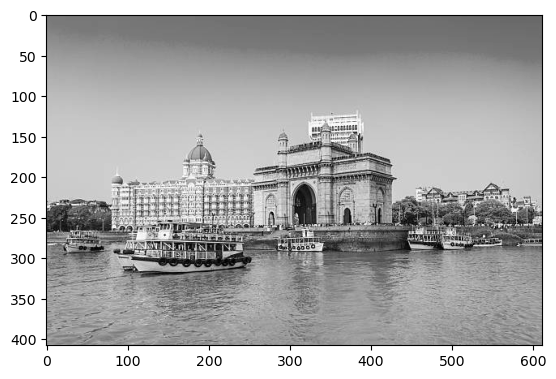

In [12]:
plt.imshow(img, cmap='gray')

In [13]:
img.shape

(408, 612)

In [16]:
gauss_noise=np.zeros((408,612),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [17]:
gn_img=cv2.add(img, gauss_noise)

Text(0.5, 1.0, 'Combined')

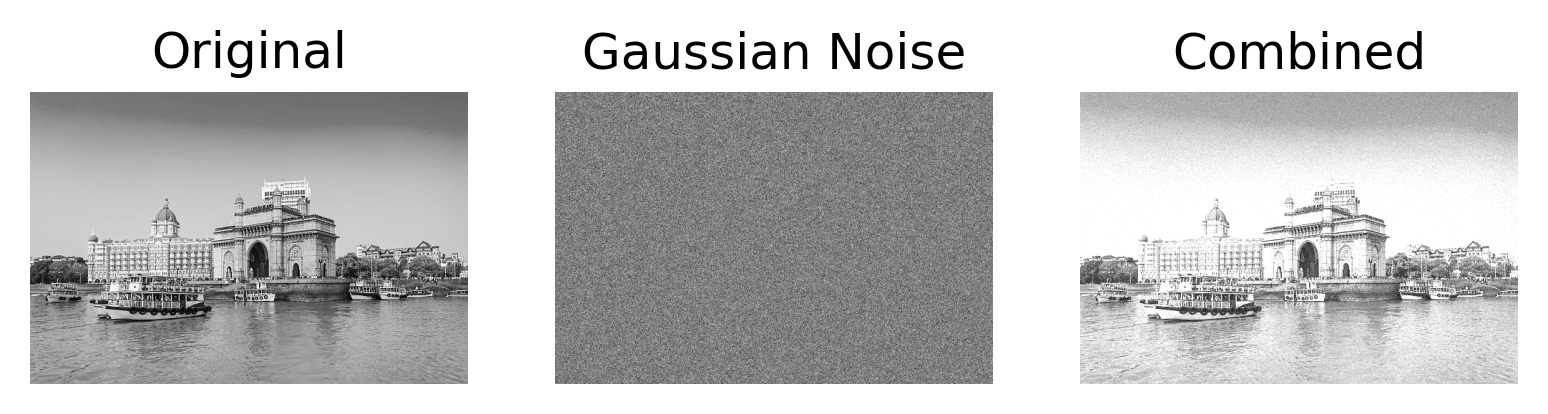

In [18]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [19]:
filter = np.array([[1/9 for i in range(3)] for j in range(3)])
filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [20]:
gn_img

array([[171, 203, 177, ..., 168, 173, 177],
       [190, 197, 199, ..., 187, 167, 157],
       [185, 205, 184, ..., 180, 170, 180],
       ...,
       [211, 207, 214, ..., 194, 200, 207],
       [172, 191, 192, ..., 210, 213, 216],
       [229, 232, 238, ..., 199, 219, 202]], dtype=uint8)

# **Average Filter**

In [21]:
output = []
for r in range(gn_img.shape[0]-2): 
  temp = []
  for c in range(gn_img.shape[1]-2):
    lhs = gn_img[r:r+3, c:c+3]
    ans = 0 
    for r_f in range(filter.shape[0]): 
      for c_f in range(filter.shape[1]):
        ans += lhs[r_f][c_f]*filter[r_f][c_f] 
    temp.append(ans) 
  output.append(temp)

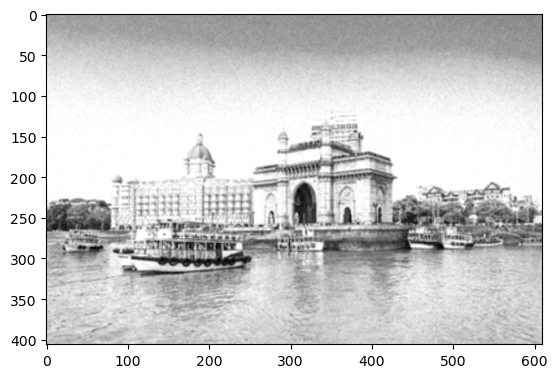

In [23]:
output = np.array(output)
plt.imshow(output, cmap='gray')

Text(0.5, 1.0, 'Average Filter')

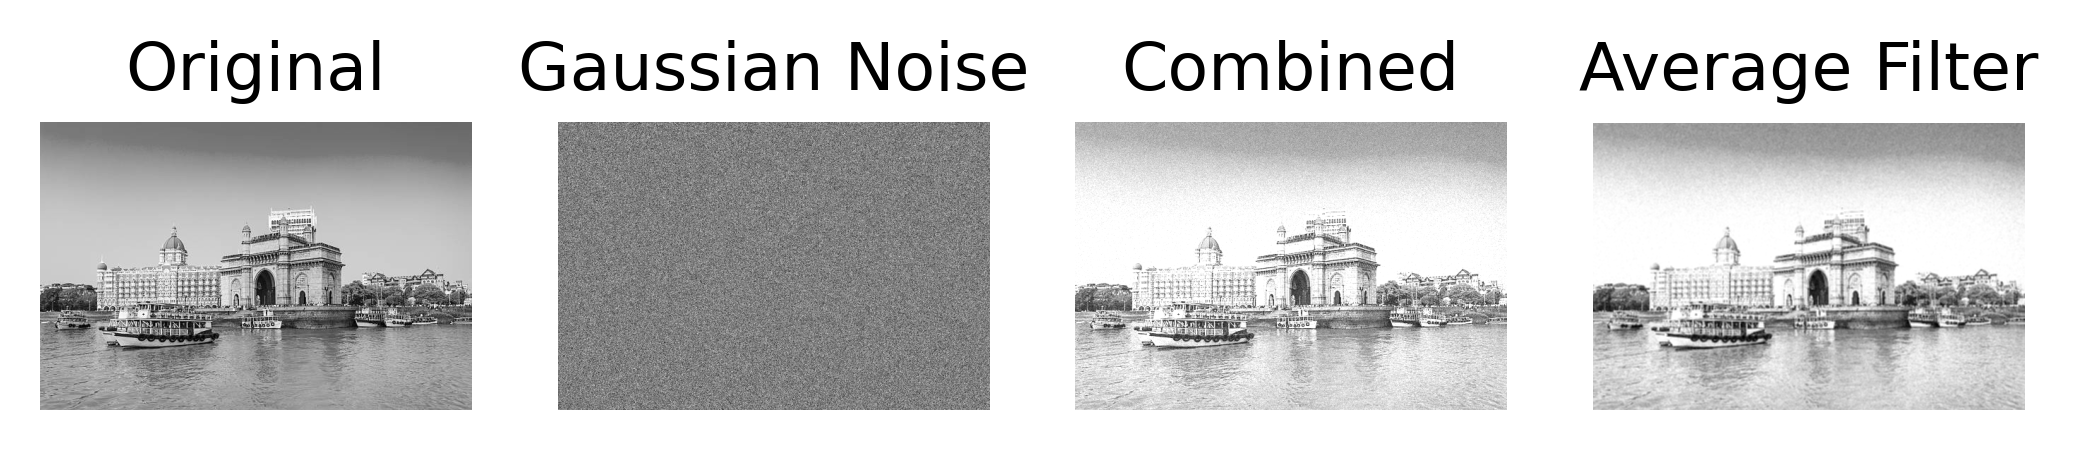

In [24]:
fig=plt.figure(dpi=400)

fig.add_subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,4,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,4,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

fig.add_subplot(1,4,4)
plt.imshow(output,cmap='gray')
plt.axis("off")
plt.title("Average Filter")

# **Median Filter**

In [25]:
import random 
salt_and_pepper_img = img.copy()
salt_and_pepper_img

array([[124, 124, 124, ..., 106, 106, 106],
       [124, 124, 124, ..., 106, 106, 106],
       [124, 124, 124, ..., 106, 106, 106],
       ...,
       [152, 152, 153, ..., 126, 132, 138],
       [128, 132, 138, ..., 144, 142, 139],
       [152, 157, 163, ..., 145, 146, 148]], dtype=uint8)

In [26]:
for i in range(200):
  row = random.randint(0, img.shape[0]-1) 
  col = random.randint(0, img.shape[1]-1) 
  n = random.randint(0,1) 
  if(n==0):
    salt_and_pepper_img[row][col] = 0 
  else: 
    salt_and_pepper_img[row][col] = 255 

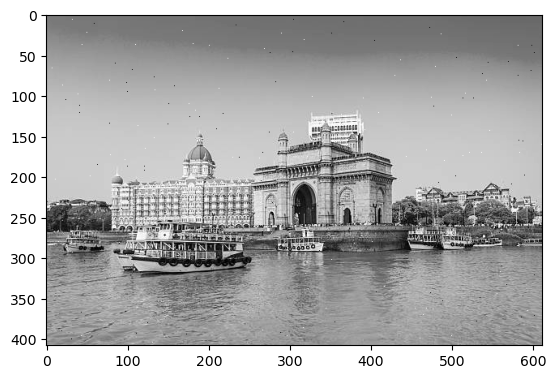

In [27]:
plt.imshow(salt_and_pepper_img, cmap='gray')

In [28]:
output = []
for r in range(salt_and_pepper_img.shape[0]-2): 
  temp = []
  for c in range(salt_and_pepper_img.shape[1]-2):
    lhs = salt_and_pepper_img[r:r+3, c:c+3]
    lhs_flatten = lhs.flatten() 
    lhs_flatten.sort() 
    temp.append(lhs_flatten[4]) 
  output.append(temp)

In [29]:
output = np.array(output)

Text(0.5, 1.0, 'Median Filter')

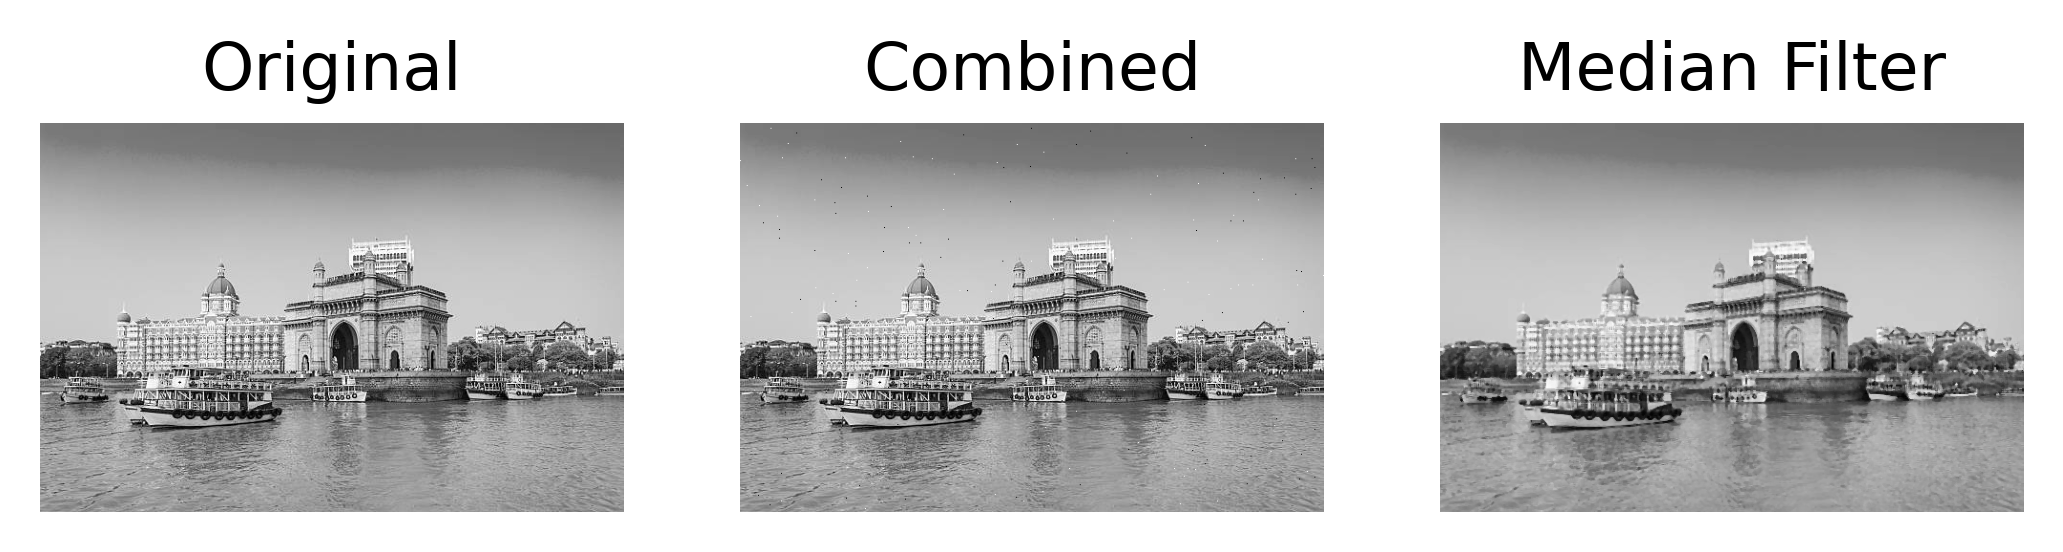

In [30]:
fig=plt.figure(dpi=400)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(salt_and_pepper_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

fig.add_subplot(1,3,3)
plt.imshow(output,cmap='gray')
plt.axis("off")
plt.title("Median Filter")